<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
np.shape(movies)
print(f"The dataset has {np.shape(movies)[0]} rows and {np.shape(movies)[1]} columns.")

The dataset has 979 rows and 6 columns.


#### Check the data type of each column.

In [4]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [5]:
# Answer:
movies.duration.mean()
print(f"The average movie is {movies.duration.mean()} minutes long.")

The average movie is 120.97957099080695 minutes long.


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
mov_duration = movies.sort_values(by = 'duration', ascending = False, ignore_index = True)
mov_duration.head(1) # the longest movie
mov_duration.tail(1) # the shortest movie

,star_rating,title,content_rating,genre,duration,actors_list
978,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

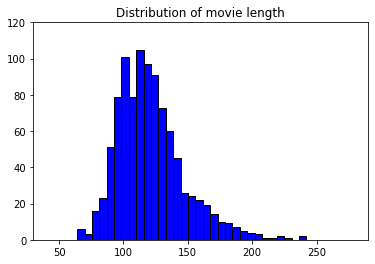

In [7]:
# Answer:
plt.hist(movies.duration, color = 'blue', edgecolor = 'black', 
         bins = int(np.sqrt(len(movies))));
plt.xlim(30, 290)
plt.ylim(0, 120)
plt.title('Distribution of movie length');

#### Use a box plot to display that same data.

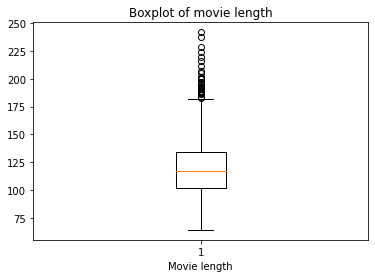

In [8]:
# Answer:
plt.boxplot(movies.duration);
plt.xlabel('Movie length');
plt.title('Boxplot of movie length');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
df = movies.groupby('content_rating')['title'].count()
df

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

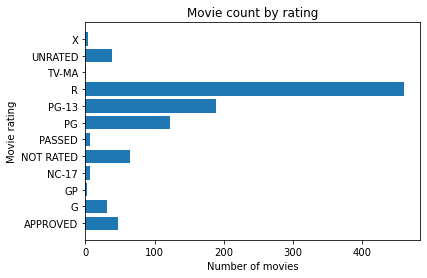

In [10]:
# Answer:
df.index
plt.barh(y = df.index, width = df);
plt.xlabel('Number of movies');
plt.ylabel('Movie rating');
plt.title('Movie count by rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:
movies.content_rating = np.where((movies.content_rating == 'NOT RATED') |
                                    (movies.content_rating == 'APPROVED')|
                                    (movies.content_rating == 'PASSED')|
                                    (movies.content_rating == 'GP'), 'UNRATED', movies.content_rating)
movies.head(50)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:
movies.content_rating = np.where((movies.content_rating == 'X') |
                                    (movies.content_rating == 'TV-MA'), 'NC-17', movies.content_rating)
movies.head(50)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Count the number of missing values in each column.

In [13]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [14]:
# Answer:
movies.content_rating = np.where(movies.content_rating == None, 'UNRATED', movies.content_rating)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [15]:
# Answer:
movies[movies.duration >= 120]['star_rating'].mean()
movies[movies.duration < 120]['star_rating'].mean()
print(f"Movies that are two hours or longer have an average rating of {movies[movies.duration >= 120]['star_rating'].mean()}. Meanwhile, those under two hours have an average rating of {movies[movies.duration < 120]['star_rating'].mean()}.")


Movies that are two hours or longer have an average rating of 7.948898678414082. Meanwhile, those under two hours have an average rating of 7.838666666666657.


#### Use a visualization to detect whether there is a relationship between duration and star rating.

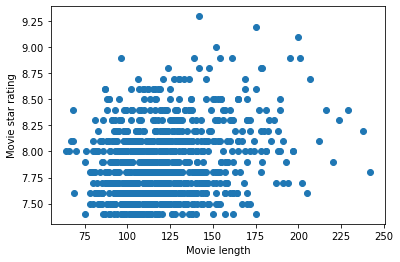

In [34]:
# Answer:
plt.scatter(movies.duration, movies.star_rating);
plt.xlabel('Movie length');
plt.ylabel('Movie star rating');

#### Calculate the average duration for each genre.

In [17]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

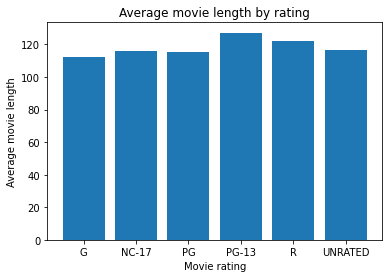

In [18]:
# Answer:
df1 = movies.groupby('content_rating')['duration'].mean()
plt.bar(x = df1.index, height = df1);
plt.ylabel('Average movie length');
plt.xlabel('Movie rating');
plt.title('Average movie length by rating');

#### Determine the top rated movie (by star rating) for each genre.

In [22]:
# Answer:
movies.groupby(['genre'])[['star_rating', 'title']].max()

,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [28]:
# Answer:
possible_duplicates = [movies.title for i in movies.title if i.count(i) > 1] # using list comprehension to pass titles that appear more than once into an array
possible_duplicates # looks like there are no duplicates

[]

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [95]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [97]:
# Answer:
df = movies.groupby('genre').filter(lambda x: len(x) >= 10)
df.groupby('genre')['genre', 'star_rating'].mean()

/var/folders/bh/d1qm8bns06vdmp0vfb623dw40000gn/T/ipykernel_8418/220995232.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('genre')['genre', 'star_rating'].mean()


,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!